1. Загрузить файл hr.csv
2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)
3. Рассчитать и визуализировать корреляционную матрицу для переменных
4. Визуализировать несколько взаимосвязей между переменными
5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными
6. Рассчитать сколько работников работает в каждом департаменте
7. Показать распределение сотрудников по зарплатам
8. Показать распределение сотрудников по зарплатам совместно с департаментами
9. Сколько сотрудников покинули компанию
10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию
11. Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в лк на сайте

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import statistics
import seaborn as sns
from scipy import stats
from scipy.stats import t
from scipy.stats import norm

In [143]:
df = pd.read_csv('HR.csv')
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


### 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [4]:
print(
    'Уровень удовлетворённости: \n среднее: ', df.satisfaction_level.mean(),
    '\n медиана: ', statistics.median(df.satisfaction_level), 
    '\n мода: ', statistics.mode(df.satisfaction_level),
    '\n минимум: ', min(df.satisfaction_level),
    '\n максимум: ', max(df.satisfaction_level),
    '\n скреднекв. отклонение: ', np.std(df.satisfaction_level),
    
    '\n\nПоследняя оценка: \n среднее: ', df.last_evaluation.mean(),
    '\n медиана: ', statistics.median(df.last_evaluation), 
    '\n мода: ', statistics.mode(df.last_evaluation),
    '\n минимум: ', min(df.last_evaluation),
    '\n максимум: ', max(df.last_evaluation),
    '\n скреднекв. отклонение: ', np.std(df.last_evaluation),
    
    '\n\nСредние часы в месяц: \n среднее: ', df.average_montly_hours.mean(),
    '\n медиана: ', statistics.median(df.average_montly_hours), 
    '\n минимум: ', min(df.average_montly_hours),
    '\n максимум: ', max(df.average_montly_hours),
    '\n скреднекв. отклонение: ', np.std(df.average_montly_hours),
    
    '\n\nСтаж в компании: \n среднее: ', df.time_spend_company.mean(),
    '\n медиана: ', statistics.median(df.time_spend_company), 
    '\n мода: ', statistics.mode(df.time_spend_company),
    '\n минимум: ', min(df.time_spend_company),
    '\n максимум: ', max(df.time_spend_company),
    '\n скреднекв. отклонение: ', np.std(df.time_spend_company))

Уровень удовлетворённости: 
 среднее:  0.6128335222348166 
 медиана:  0.64 
 мода:  0.1 
 минимум:  0.09 
 максимум:  1.0 
 скреднекв. отклонение:  0.24862236268207252 

Последняя оценка: 
 среднее:  0.7161017401159978 
 медиана:  0.72 
 мода:  0.55 
 минимум:  0.36 
 максимум:  1.0 
 скреднекв. отклонение:  0.1711634045107442 

Средние часы в месяц: 
 среднее:  201.0503366891126 
 медиана:  200 
 минимум:  96 
 максимум:  310 
 скреднекв. отклонение:  49.94143446256241 

Стаж в компании: 
 среднее:  3.498233215547703 
 медиана:  3 
 мода:  3 
 минимум:  2 
 максимум:  10 
 скреднекв. отклонение:  1.4600875552714847


### 3. Рассчитать и визуализировать корреляционную матрицу для переменных

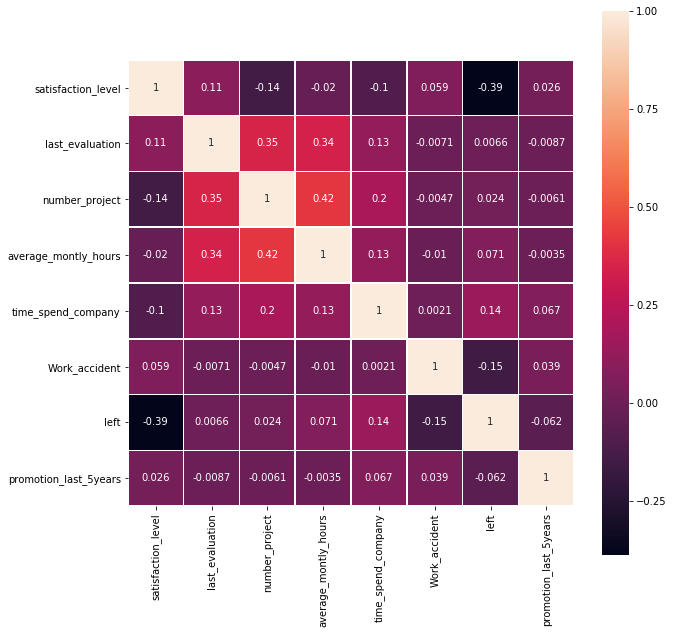

In [5]:
fig, ax = plt.subplots(figsize=(10,10))
corr = df.corr()
ax = sns.heatmap(corr,
                 xticklabels=corr.columns.values,
                 yticklabels=corr.columns.values,
                 square=True,
                 linewidths=0.5,
                 annot=True)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)
plt.show()

### 4. Визуализировать несколько взаимосвязей между переменными

Оценка растёт по мере увеличения лет стажа сотрудника, а также (и в большей мере) в связи с бОльшим колиеством часов в месяц.

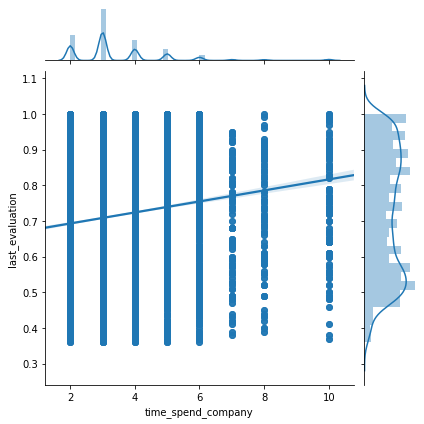

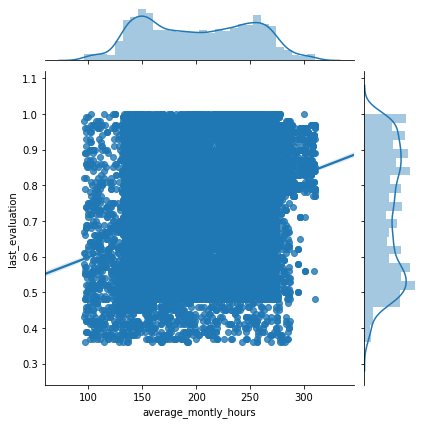

In [6]:
sns.jointplot(x='time_spend_company', y='last_evaluation', 
              data=df, kind='reg')
sns.jointplot(x='average_montly_hours', y='last_evaluation', 
              data=df, kind='reg')

Средний уровень удовлетворённости сотрудников по отделам

In [8]:
satisfied_deps = df.groupby('sales')[['satisfaction_level']].mean().sort_values('satisfaction_level', ascending=False)
satisfied_deps.style.bar()

,satisfaction_level
sales,
management,0.621349
RandD,0.619822
product_mng,0.619634
marketing,0.618601
support,0.6183
IT,0.618142
sales,0.614447
technical,0.607897
hr,0.598809


Зависимость среднего количества рабочих часов в месяц от стажа сотрудника

Text(0, 0.5, 'Среднее количество раб. часов в месяц')

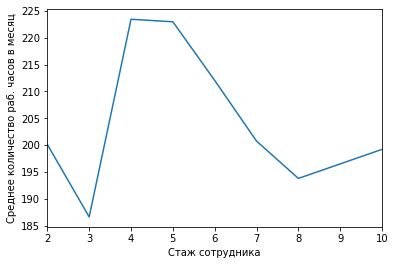

In [54]:
df.groupby('time_spend_company').average_montly_hours.mean().plot()
plt.xlabel('Стаж сотрудника')
plt.ylabel('Среднее количество раб. часов в месяц')

 Уровень удовлетворённости сотрудников в зависимости от стажа

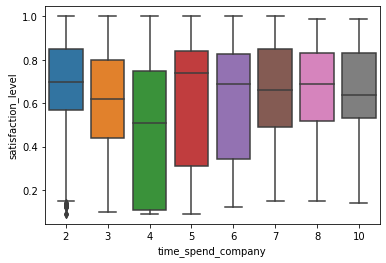

In [49]:
sns.boxplot(x="time_spend_company", y="satisfaction_level", data=df)

top-5 отделов по количеству повышений за последние 5 лет

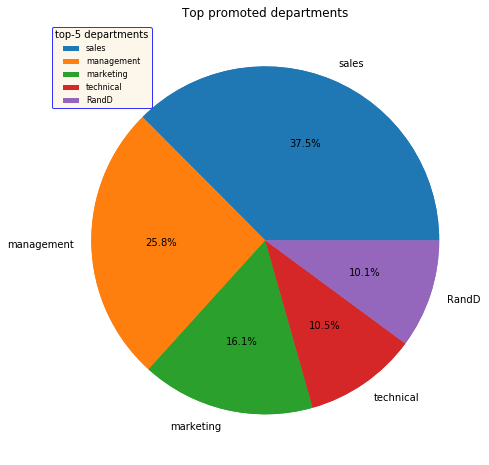

In [117]:
top_promoted = df.groupby('sales').promotion_last_5years.sum().sort_values(ascending=False).head()
ax = top_promoted.plot(kind='pie', figsize=(8, 8), title='Top promoted departments')
ax.legend(fontsize = 8,
          ncol = 1,
          facecolor = 'oldlace',
          edgecolor = 'b',
          title = 'top-5 departments',
          title_fontsize = '10',
          loc="upper left"
         )
plt.ylabel("")

values = list(top_promoted)
ax.pie(values, autopct="%.1f%%")
plt.show()

### 5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными

In [210]:
oldies = df[df['time_spend_company']==10]['satisfaction_level']
freshies = df[df['time_spend_company']==3]['satisfaction_level']

stats.ttest_ind(oldies, freshies)

Ttest_indResult(statistic=2.010477498716272, pvalue=0.0444209429058579)

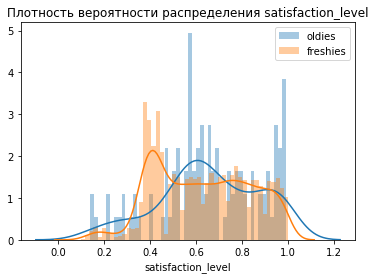

In [211]:
sns.distplot(oldies, 50)
sns.distplot(freshies, 50)
plt.title('Плотность вероятности распределения satisfaction_level')
plt.legend(['oldies', 'freshies'])
plt.show()

Группы статистически отличаются. Чем дольше сотрудник работает в компании, тем выше уровень удовлетворённости.

In [215]:
left = df[df['left']==1]['satisfaction_level']
stayed = df[df['left']==0]['satisfaction_level']
stats.ttest_ind(left, stayed)

Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)

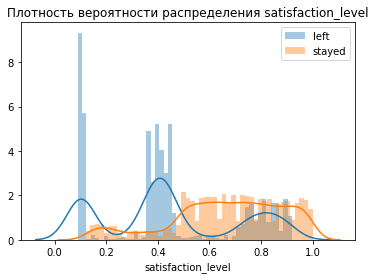

In [216]:
sns.distplot(left, 50)
sns.distplot(stayed, 50)
plt.title('Плотность вероятности распределения satisfaction_level')
plt.legend(['left', 'stayed'])
plt.show()

Не увольняются неспроста: уровень удовлетворённости настоящих сотрудников выше в сравнении с уволившимися

In [232]:
it = df[df['sales']=='IT']['last_evaluation']
product_mng = df[df['sales']=='product_mng']['last_evaluation']
stats.ttest_ind(it, sales)

Ttest_indResult(statistic=1.2879000919517831, pvalue=0.1978362902863815)

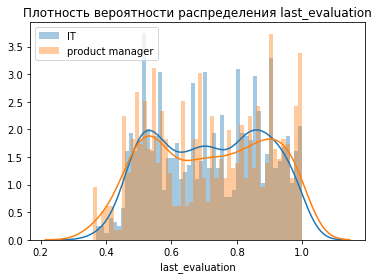

In [234]:
sns.distplot(it, 50)
sns.distplot(product_mng, 50)
plt.title('Плотность вероятности распределения last_evaluation')
plt.legend(['IT', 'product manager'])
plt.show()

Группы статистически близки

### 6. Рассчитать сколько работников работает в каждом департаменте

In [149]:
depts = df.groupby('sales').count().salary
print(depts)

sales
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: salary, dtype: int64


### 7.Показать распределение сотрудников по зарплатам

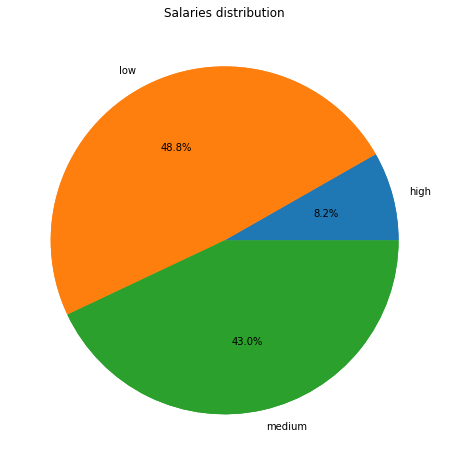

In [118]:
salaries = df.groupby('salary').count().sales
ax = salaries.plot(kind='pie', figsize=(8, 8), title='Salaries distribution')
plt.ylabel("")

values = list(salaries)
ax.pie(values, autopct="%.1f%%")
plt.show()

### 8.Показать распределение сотрудников по зарплатам совместно с департаментами

Text(0, 0.5, 'number of employees')

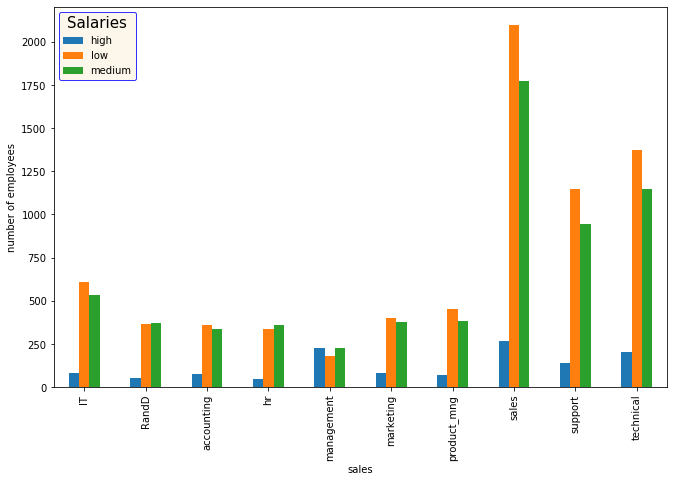

In [153]:
salary_dep = df.pivot_table(index = 'sales', 
               columns = 'salary', 
               values = 'satisfaction_level', 
               aggfunc = 'count', 
               fill_value = 0)
ax = salary_dep.plot(kind='bar', figsize=(11, 7))
ax.legend(fontsize = 10,
          ncol = 1,
          facecolor = 'oldlace',
          edgecolor = 'b',
          title = 'Salaries',
          title_fontsize = '15',
          loc="upper left"
         )
plt.ylabel("number of employees")

In [155]:
print(salary_dep)

salary       high   low  medium
sales                          
IT             83   609     535
RandD          51   364     372
accounting     74   358     335
hr             45   335     359
management    225   180     225
marketing      80   402     376
product_mng    68   451     383
sales         269  2099    1772
support       141  1146     942
technical     201  1372    1147


### 9.Сколько сотрудников покинули компанию

In [148]:
left = df[df.left==1]
left.left.count()

3571

### 10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

In [242]:
#зависимость между увольнениями и личными показателями (посдедняя оценка)
from scipy.stats import kendalltau
stat, p = kendalltau(df.left, df.last_evaluation)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Вероятно, независимы')
else:
    print('Вероятно, зависимы')

stat=-0.002, p=0.765
Вероятно, независимы


In [238]:
#гипотеза о том, что увольнения связаны с отсутствием повышений
from scipy.stats import spearmanr

stat, p = spearmanr(df.left, df.promotion_last_5years)
print('stat=%.2f, p=%.2f' % (stat, p))
if p > 0.05:
    print('Вероятно, независимы')
else:
    print('Вероятно, зависимы')

stat=-0.06, p=0.00
Вероятно, зависимы


In [245]:
from scipy.stats import pearsonr
pearsonr(df.left, df.satisfaction_level)

(-0.38837498342411414, 0.0)

In [246]:
#логичная гипотеза о том, что существует зависимость между уровнем удовлетворённости и увольнениями
from scipy.stats import kendalltau
stat, p = kendalltau(df.left, df.satisfaction_level)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Вероятно, независимы')
else:
    print('Вероятно, зависимы')

stat=-0.301, p=0.000
Вероятно, зависимы


In [251]:
#гипотеза о том, что больше увольняются "старички"
old = df[df['time_spend_company']==10].left
new = df[df['time_spend_company']==3].left
avg = df[df['time_spend_company']==6].left

stats.f_oneway(old, new, avg)

F_onewayResult(statistic=39.389983240165726, pvalue=9.636220955675145e-18)

Принимаем Н0, группы независимы.

Можно сделать промежуточный вывод о том, что увольнения коррелируют с отсутствием повышений, а также низким уровнем удовлетворённости сотрудников. Также можно предположить, что увольняются чаще по слбственному желанию (независимо от оценки) и независимо от стажа.